# Description
Hello I am Ihsan.<br>
In this kernal, I performed the research of GPU - CUDA, Metal, OpenCL, Vulkan Scores dataset. I researched the API scores of GPU brands such as Cuda, Metal, OpenCL, Vulkan. I first made the review of all brands, then the brand-specific review. In addition, I mentioned how many graphic cards are in the data set of the brands at first. After the number of graphics cards of the brands, it continues with the score ranking part. The reason why I did such a study was to take my first steps in data science with projects and I wanted to see the graphics card score rankings separately. I hope it will be useful for you. <br>
[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/alanjo/gpu-scores-with-cuda-metal-opencl-vulkan)

# Contents
1. [Dataset Review](#1)<br>
1. [Number of Graphics Cards in the Data Set and Visualization](#2)<br>
1. [Sort by Most and Least Points](#3)<br>
1. [Total Point and Average of Graphics Cards](#4)<br>
1. [Brands Review](#5)<br>
    1. [Nvidia](#6)<br>
    1. [AMD](#7)<br>
    1. [Intel](#8)<br>
    1. [ARM](#9)<br>
    1. [Qualcomm](#10)<br>
    1. [Apple](#11)<br>
    1. [Results of Other Graphic Cards](#12)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gpu-scores-with-cuda-metal-opencl-vulkan/GPU_scores_graphicsAPIs.csv


# Dataset Review<a id="1"></a>

In [2]:
# Reading the dataset with the pandan library.
data = pd.read_csv('/kaggle/input/gpu-scores-with-cuda-metal-opencl-vulkan/GPU_scores_graphicsAPIs.csv')

In [3]:
# İnformation of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1213 non-null   object 
 1   Device        1213 non-null   object 
 2   CUDA          266 non-null    float64
 3   Metal         241 non-null    float64
 4   OpenCL        976 non-null    float64
 5   Vulkan        629 non-null    float64
dtypes: float64(4), object(2)
memory usage: 57.0+ KB


In [4]:
# This is top ten data of dataset.
data.head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Nvidia,GeForce RTX 3090 Ti,260346.0,NaN,229738.0,141134.0
1,Nvidia,A100 80GB PCIe,259828.0,NaN,214586.0,NaN
2,Nvidia,A100-PCIE-80GB,256292.0,NaN,207124.0,NaN
3,Nvidia,GeForce RTX 3090,238123.0,NaN,204921.0,138859.0
4,Nvidia,A100-SXM4-40GB,237220.0,NaN,190489.0,NaN
5,Nvidia,GeForce RTX 3080 Ti,235513.0,NaN,209081.0,131975.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,233910.0,NaN,196825.0,NaN
7,Nvidia,RTX A6000,224604.0,NaN,200330.0,109243.0
8,Nvidia,GRID A100-4C,219037.0,NaN,NaN,NaN
9,Nvidia,Tesla V100S-PCIE-32GB,216224.0,NaN,186147.0,NaN


In [5]:
# Dataset Correlation: Relationship between columns
data.corr()

,CUDA,Metal,OpenCL,Vulkan
CUDA,1.000000,0.968344,0.989998,0.947777
Metal,0.968344,1.000000,0.949260,0.902328
OpenCL,0.989998,0.949260,1.000000,0.963259
Vulkan,0.947777,0.902328,0.963259,1.000000


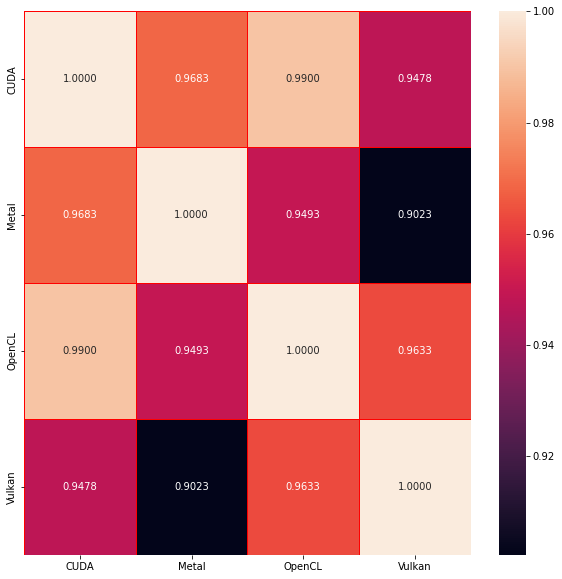

In [6]:
# Visualization of correlation results with seaborn library heatmap.
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".4f",ax=ax)
plt.show()

<Figure size 720x720 with 0 Axes>

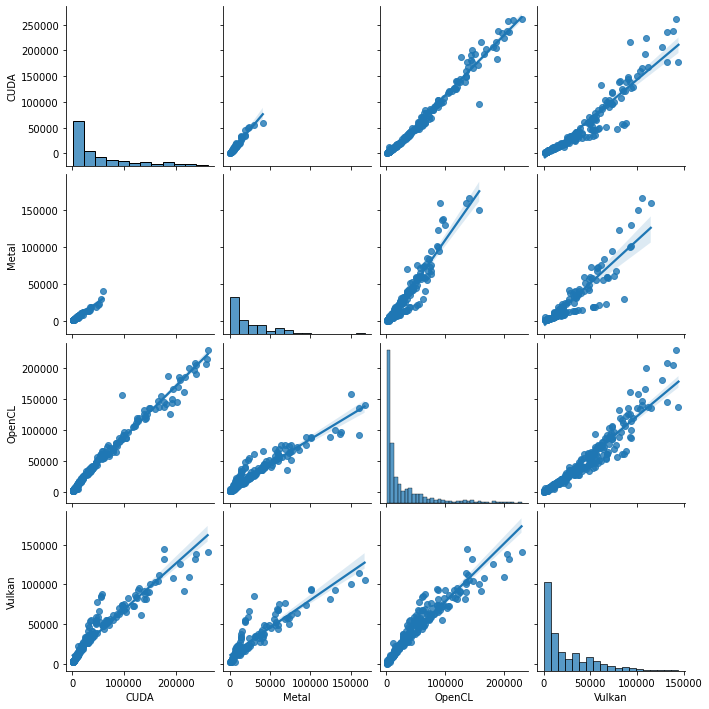

In [7]:
# Visualization of correlation results with seaborn library pairplot.
plt.figure(figsize=(10,10))
sns.pairplot(data, kind="reg")
plt.show()

In [8]:
# Dataset Values(Max, min, std...)
data.describe()

,CUDA,Metal,OpenCL,Vulkan
count,266.000000,241.000000,976.000000,629.000000
mean,57482.319549,29624.676349,25536.302254,25106.922099
std,65326.792548,33610.610759,37451.318235,27811.382105
min,1282.000000,26.000000,182.000000,23.000000
25%,9956.250000,5204.000000,3277.750000,4601.000000
50%,31058.000000,17314.000000,9252.500000,12579.000000
75%,84008.750000,41982.000000,34744.750000,38856.000000
max,260346.000000,166946.000000,229738.000000,144238.000000


In [9]:
# Dataset Columns Names
data.columns

Index(['Manufacturer', 'Device', 'CUDA', 'Metal', 'OpenCL', 'Vulkan'], dtype='object')

<a id="2"></a>
# Number of Graphics Cards in the Data Set and Visualization

In [10]:
# Number of graphics card brands in the dataset!
dataManu = data["Manufacturer"].value_counts(dropna=False)
dataManu

AMD         546
Nvidia      404
Intel       144
ARM          58
Qualcomm     22
Apple        21
PowerVR      10
Other         7
Samsung       1
Name: Manufacturer, dtype: int64

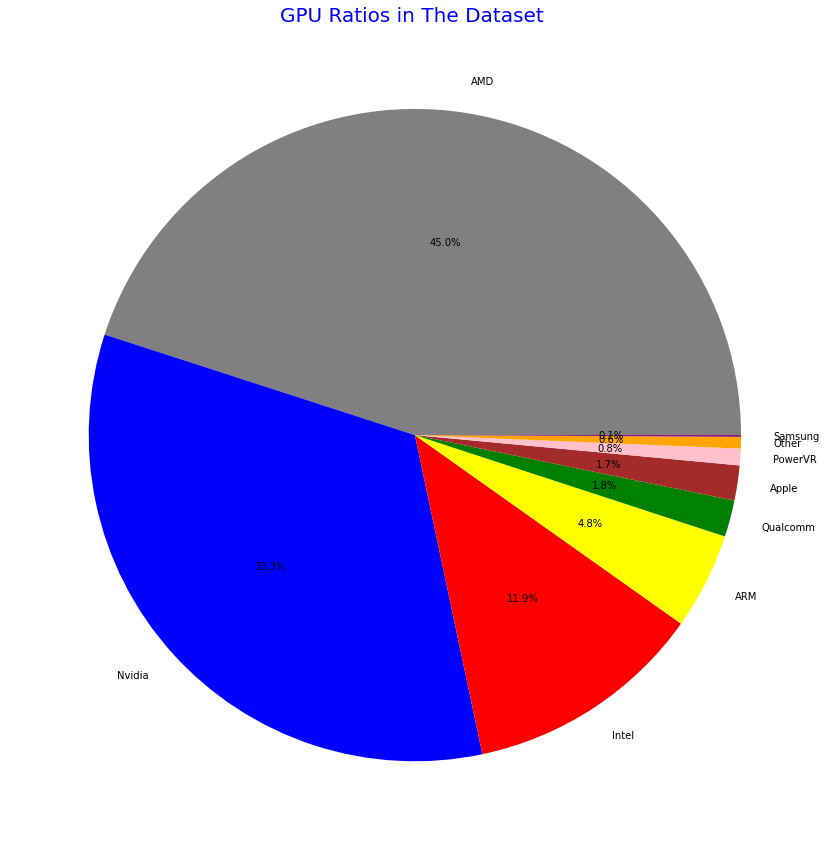

In [11]:
# Visualization of the graphics cards in the dataset with the matplotlib library. (Pie Plot)
data.Manufacturer.dropna(inplace=True)
labels=data.Manufacturer.value_counts().index
y = list(labels)
data.Manufacturer.dropna(inplace=True)
labels=data.Manufacturer.value_counts().index
colors=['grey','blue','red','yellow','green','brown','pink','orange','purple']
explode=[0,0,0,0,0,0,0,0,0]
sizes=data.Manufacturer.value_counts().values

# visual
plt.figure(figsize=(15,15))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title('GPU Ratios in The Dataset ',color = 'blue',fontsize = 20)
plt.show()

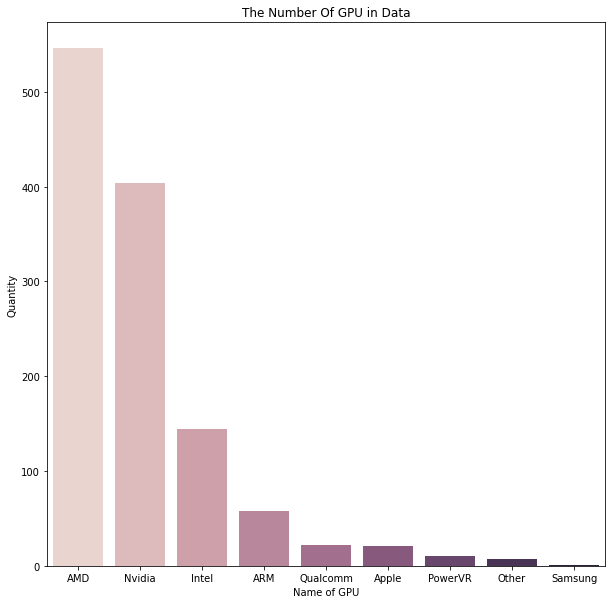

In [12]:
# Visualization of the graphics cards in the dataset with the matplotlib library. (Bar Plot)
dataManu = data["Manufacturer"].value_counts(dropna=False)
dataManudf = np.array(dataManu)
x = list(dataManudf)

plt.figure(figsize=(10,10))
sns.barplot(x = y,y = x,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("Name of GPU")
plt.ylabel("Quantity")
plt.title("The Number Of GPU in Data")
plt.show()

# Sort by Most and Least Points  <a id="3"></a>

In [13]:
# Graphics API is the part we take separately in our dataset. (Cuda, Metal, OpenCL, Vulkan)
data_1 = pd.read_csv('/kaggle/input/gpu-scores-with-cuda-metal-opencl-vulkan/GPU_scores_graphicsAPIs.csv')

dataManufacturer = data_1["Manufacturer"]
dataDevice = data_1["Device"]

dataCUDA = data_1["CUDA"]
dataMETAL = data_1["Metal"]
dataOPENCL = data_1["OpenCL"]
dataVULKAN = data_1["Vulkan"]

dataCuda =  pd.concat([dataManufacturer,dataDevice,dataCUDA],axis=1)
dataMetal =  pd.concat([dataManufacturer,dataDevice,dataMETAL],axis=1)
dataOpenCL =  pd.concat([dataManufacturer,dataDevice,dataOPENCL],axis=1)
dataVulkan =  pd.concat([dataManufacturer,dataDevice,dataVULKAN],axis=1)
dataCuda


,Manufacturer,Device,CUDA
0,Nvidia,GeForce RTX 3090 Ti,260346.0
1,Nvidia,A100 80GB PCIe,259828.0
2,Nvidia,A100-PCIE-80GB,256292.0
3,Nvidia,GeForce RTX 3090,238123.0
4,Nvidia,A100-SXM4-40GB,237220.0
...,...,...,...
1208,AMD,Vega 20 [Radeon VII],NaN
1209,Other,VeriSilicon,NaN
1210,Other,VideoCore VI HW (V3D-620),NaN
1211,Intel,Xe Graphics,NaN


In [14]:
# Graphics cards and brands with the most points in the Cuda program.
dataCuda.sort_values("CUDA", ascending=False).head(10)

,Manufacturer,Device,CUDA
0,Nvidia,GeForce RTX 3090 Ti,260346.0
1,Nvidia,A100 80GB PCIe,259828.0
2,Nvidia,A100-PCIE-80GB,256292.0
3,Nvidia,GeForce RTX 3090,238123.0
4,Nvidia,A100-SXM4-40GB,237220.0
5,Nvidia,GeForce RTX 3080 Ti,235513.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,233910.0
7,Nvidia,RTX A6000,224604.0
8,Nvidia,GRID A100-4C,219037.0
9,Nvidia,Tesla V100S-PCIE-32GB,216224.0


In [15]:
# Graphics cards and brands with the lowest score in the Cuda program.
dataCuda.sort_values("CUDA", ascending=True).head(10)

,Manufacturer,Device,CUDA
265,Nvidia,NVS 510,1282.0
264,Nvidia,Quadro K1000M,1335.0
263,Nvidia,Quadro K420,1350.0
262,Nvidia,Quadro K600,1356.0
261,Nvidia,Quadro K610M,1504.0
260,Nvidia,GeForce GT 720,1514.0
259,Nvidia,GeForce GT 710,1534.0
258,Nvidia,GeForce GT 640M,2200.0
257,Nvidia,Quadro K1100M,2205.0
256,Nvidia,GeForce GT 630,2317.0


In [16]:
# Graphics cards and brands with the most points in the Metal program.
dataMetal.sort_values("Metal", ascending=False).head(10)

,Manufacturer,Device,Metal
916,AMD,Radeon Pro W6900X,166946.0
859,AMD,Radeon Navi21,159946.0
1058,AMD,Radeon RX 6900 XT,159528.0
1055,AMD,Radeon RX 6800 XT,150488.0
914,AMD,Radeon PRO W6800X,138267.0
915,AMD,Radeon PRO W6800X Duo,136289.0
1054,AMD,Radeon RX 6800,129800.0
913,AMD,Radeon PRO W6800,123872.0
738,AMD,Radeon HD 6900 XT,121732.0
834,AMD,Radeon HD GFX10 Family Unknown Prototype,120858.0


In [17]:
# Graphics cards and brands with the lowest score in the Metal program.
dataMetal.sort_values("Metal", ascending=True).head(10)

,Manufacturer,Device,Metal
288,Apple,A7 GPU,26.0
476,Intel,HD Graphics 4000,147.0
485,Intel,HD Graphics 5000,408.0
526,Intel,Iris Graphics,457.0
289,Apple,A8 GPU,476.0
539,Intel,Iris Pro Graphics,478.0
290,Apple,A8X GPU,754.0
664,Nvidia,Quadro 410,804.0
264,Nvidia,Quadro K1000M,947.0
265,Nvidia,NVS 510,987.0


In [18]:
# Graphics cards and brands with the most points in the OpenCL program.
dataOpenCL.sort_values("OpenCL", ascending=False).head(10)

,Manufacturer,Device,OpenCL
0,Nvidia,GeForce RTX 3090 Ti,229738.0
1,Nvidia,A100 80GB PCIe,214586.0
5,Nvidia,GeForce RTX 3080 Ti,209081.0
2,Nvidia,A100-PCIE-80GB,207124.0
3,Nvidia,GeForce RTX 3090,204921.0
7,Nvidia,RTX A6000,200330.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,196825.0
4,Nvidia,A100-SXM4-40GB,190489.0
20,Nvidia,A40-8Q,188056.0
9,Nvidia,Tesla V100S-PCIE-32GB,186147.0


In [19]:
# Graphics cards and brands with the lowest score in the OpenCL program.
dataOpenCL.sort_values("OpenCL", ascending=True).head(10)

,Manufacturer,Device,OpenCL
622,ARM,Mali-T720,182.0
711,AMD,Radeon HD 6290,220.0
713,AMD,Radeon HD 6310,302.0
743,AMD,Radeon HD 7310,312.0
714,AMD,Radeon HD 6320,354.0
697,AMD,Radeon HD 5400,385.0
744,AMD,Radeon HD 7340,389.0
698,AMD,Radeon HD 5450,392.0
621,ARM,Mali-T628,399.0
473,Intel,HD Graphics 2500,401.0


In [20]:
# Graphics cards and brands with the most points in the Vulkan program.
dataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
23,Nvidia,TITAN V,144238.0
0,Nvidia,GeForce RTX 3090 Ti,141134.0
3,Nvidia,GeForce RTX 3090,138859.0
24,Nvidia,GeForce RTX 2080 Ti,132328.0
5,Nvidia,GeForce RTX 3080 Ti,131975.0
11,Nvidia,GeForce RTX 3080,126138.0
1058,AMD,Radeon RX 6900 XT,114610.0
27,Nvidia,TITAN RTX,111342.0
7,Nvidia,RTX A6000,109243.0
15,Nvidia,RTX A5000,108730.0


In [21]:
# Graphics cards and brands with the lowest score in the Vulkan program.
dataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
624,ARM,Mali-T820,23.0
648,PowerVR,PowerVR Rogue GE8100,43.0
625,ARM,Mali-T830,50.0
626,ARM,Mali-T860,67.0
649,PowerVR,PowerVR Rogue GE8300,69.0
647,PowerVR,PowerVR Rogue G6110,71.0
1209,Other,VeriSilicon,73.0
652,PowerVR,PowerVR Rogue GE9215,75.0
1210,Other,VideoCore VI HW (V3D-620),76.0
650,PowerVR,PowerVR Rogue GE8320,82.0


# Total Point and Average of Graphics Cards <a id="4" ></a>

In [22]:
# We make to read of dataset again. The reason I do this So that it doesn't interfere with what I've done before.
data_2 = pd.read_csv('/kaggle/input/gpu-scores-with-cuda-metal-opencl-vulkan/GPU_scores_graphicsAPIs.csv')

In [23]:
# I change NaN values to 0.0.
data_nan = data_2.fillna(0)
data_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1213 non-null   object 
 1   Device        1213 non-null   object 
 2   CUDA          1213 non-null   float64
 3   Metal         1213 non-null   float64
 4   OpenCL        1213 non-null   float64
 5   Vulkan        1213 non-null   float64
dtypes: float64(4), object(2)
memory usage: 57.0+ KB


In [24]:
# NaN-free version of our data
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0
...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0


In [25]:
# The part where we get the totals and averages of the graphics cards found in our data.
data_nan["Sum_Score"] = 0.0
data_nan["Mean_Score"] = 0.0
for i in range(0, len(data_nan)):
    Toplam = data_nan[i:i+1].CUDA[i] + data_nan[i:i+1].Metal[i] + data_nan[i:i+1].OpenCL[i] + data_nan[i:i+1].Vulkan[i]
    data_nan["Sum_Score"][i] = Toplam
    Ortalama = Toplam / 4
    data_nan["Mean_Score"][i] = Ortalama
data_nan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [26]:
# Ranking Sum_Score and Mean_Score from largest to smallest!
data_nan.sort_values("Sum_Score", ascending=False).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
5,Nvidia,GeForce RTX 3080 Ti,235513.0,0.0,209081.0,131975.0,576569.0,144142.25
7,Nvidia,RTX A6000,224604.0,0.0,200330.0,109243.0,534177.0,133544.25
11,Nvidia,GeForce RTX 3080,206390.0,0.0,181771.0,126138.0,514299.0,128574.75
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
10,Nvidia,A100-PCIE-40GB,215434.0,0.0,161590.0,92245.0,469269.0,117317.25
15,Nvidia,RTX A5000,193384.0,0.0,166307.0,108730.0,468421.0,117105.25
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
23,Nvidia,TITAN V,176773.0,0.0,136749.0,144238.0,457760.0,114440.00


In [27]:
# Ranking Sum_Score and Mean_Score from smallest to largest!
data_nan.sort_values("Sum_Score", ascending=True).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
624,ARM,Mali-T820,0.0,0.0,0.0,23.0,23.0,5.75
288,Apple,A7 GPU,0.0,26.0,0.0,0.0,26.0,6.50
648,PowerVR,PowerVR Rogue GE8100,0.0,0.0,0.0,43.0,43.0,10.75
649,PowerVR,PowerVR Rogue GE8300,0.0,0.0,0.0,69.0,69.0,17.25
647,PowerVR,PowerVR Rogue G6110,0.0,0.0,0.0,71.0,71.0,17.75
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
652,PowerVR,PowerVR Rogue GE9215,0.0,0.0,0.0,75.0,75.0,18.75
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
650,PowerVR,PowerVR Rogue GE8320,0.0,0.0,0.0,82.0,82.0,20.50
651,PowerVR,PowerVR Rogue GE8322,0.0,0.0,0.0,92.0,92.0,23.00


# **Brands Review** <a id="5"></a>

In [28]:
# Number of graphics card brands in the dataset!
data_1.Manufacturer.value_counts(dropna=False)

AMD         546
Nvidia      404
Intel       144
ARM          58
Qualcomm     22
Apple        21
PowerVR      10
Other         7
Samsung       1
Name: Manufacturer, dtype: int64

# **A. Nvidia** <a id="6"></a>

In [29]:
# We just take the results of the Nvidia Graphics card in the Data Set.
Nvidia = data_1["Manufacturer"] == "Nvidia"
dataNvidia = data_1[Nvidia]
dataNvidia.index = range(0,404,1) # index editing
dataNvidia

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Nvidia,GeForce RTX 3090 Ti,260346.0,NaN,229738.0,141134.0
1,Nvidia,A100 80GB PCIe,259828.0,NaN,214586.0,NaN
2,Nvidia,A100-PCIE-80GB,256292.0,NaN,207124.0,NaN
3,Nvidia,GeForce RTX 3090,238123.0,NaN,204921.0,138859.0
4,Nvidia,A100-SXM4-40GB,237220.0,NaN,190489.0,NaN
...,...,...,...,...,...,...
399,Nvidia,Tesla K10,NaN,NaN,14029.0,NaN
400,Nvidia,Tesla K10.G1.8GB,NaN,NaN,11692.0,10452.0
401,Nvidia,Tesla K10.G2.8GB,NaN,NaN,11722.0,NaN
402,Nvidia,Tesla M2090,NaN,NaN,11728.0,NaN


In [30]:
# Dataset values of Nvidia(Min, Max, std...)
dataNvidia.describe()

,CUDA,Metal,OpenCL,Vulkan
count,266.000000,73.000000,381.000000,225.000000
mean,57482.319549,7353.780822,37626.454068,35555.813333
std,65326.792548,7240.992739,49421.502124,33124.097123
min,1282.000000,804.000000,751.000000,714.000000
25%,9956.250000,2407.000000,4424.000000,9230.000000
50%,31058.000000,5204.000000,14510.000000,23382.000000
75%,84008.750000,8704.000000,51217.000000,54616.000000
max,260346.000000,41063.000000,229738.000000,144238.000000


In [31]:
# Graphics API is the part we take separately in our dataset for Nvidia.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataNvidia["Manufacturer"]
dataDevice = dataNvidia["Device"]

NdataCUDA = dataNvidia["CUDA"]
NdataMETAL = dataNvidia["Metal"]
NdataOPENCL = dataNvidia["OpenCL"]
NdataVULKAN = dataNvidia["Vulkan"]

NdataCuda =  pd.concat([dataManufacturer,dataDevice,NdataCUDA],axis=1)
NdataMetal =  pd.concat([dataManufacturer,dataDevice,NdataMETAL],axis=1)
NdataOpenCL =  pd.concat([dataManufacturer,dataDevice,NdataOPENCL],axis=1)
NdataVulkan =  pd.concat([dataManufacturer,dataDevice,NdataVULKAN],axis=1)
NdataCuda

,Manufacturer,Device,CUDA
0,Nvidia,GeForce RTX 3090 Ti,260346.0
1,Nvidia,A100 80GB PCIe,259828.0
2,Nvidia,A100-PCIE-80GB,256292.0
3,Nvidia,GeForce RTX 3090,238123.0
4,Nvidia,A100-SXM4-40GB,237220.0
...,...,...,...
399,Nvidia,Tesla K10,NaN
400,Nvidia,Tesla K10.G1.8GB,NaN
401,Nvidia,Tesla K10.G2.8GB,NaN
402,Nvidia,Tesla M2090,NaN


**Nvidia CUDA Minimum and Maximum Score**


In [32]:
# The most rated graphics cards in the cuda program of the Nvidia graphics card brand.
NdataCuda.sort_values("CUDA", ascending=False).head(10)

,Manufacturer,Device,CUDA
0,Nvidia,GeForce RTX 3090 Ti,260346.0
1,Nvidia,A100 80GB PCIe,259828.0
2,Nvidia,A100-PCIE-80GB,256292.0
3,Nvidia,GeForce RTX 3090,238123.0
4,Nvidia,A100-SXM4-40GB,237220.0
5,Nvidia,GeForce RTX 3080 Ti,235513.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,233910.0
7,Nvidia,RTX A6000,224604.0
8,Nvidia,GRID A100-4C,219037.0
9,Nvidia,Tesla V100S-PCIE-32GB,216224.0


In [33]:
# The lowest rated graphics cards in the cuda program of the Nvidia graphics card brand.
NdataCuda.sort_values("CUDA", ascending=True).head(10)

,Manufacturer,Device,CUDA
265,Nvidia,NVS 510,1282.0
264,Nvidia,Quadro K1000M,1335.0
263,Nvidia,Quadro K420,1350.0
262,Nvidia,Quadro K600,1356.0
261,Nvidia,Quadro K610M,1504.0
260,Nvidia,GeForce GT 720,1514.0
259,Nvidia,GeForce GT 710,1534.0
258,Nvidia,GeForce GT 640M,2200.0
257,Nvidia,Quadro K1100M,2205.0
256,Nvidia,GeForce GT 630,2317.0


**Nvidia Metal Minimum and Maximum Score**

In [34]:
# The most rated graphics cards in the Metal program of the Nvidia graphics card brand.
NdataMetal.sort_values("Metal", ascending=False).head(10)

,Manufacturer,Device,Metal
87,Nvidia,TITAN Xp COLLECTORS EDITION,41063.0
92,Nvidia,GeForce GTX 1080 Ti,30624.0
94,Nvidia,GeForce GTX 1080,23824.0
95,Nvidia,GeForce GTX 1070 Ti,22180.0
118,Nvidia,GeForce GTX 980 Ti,19520.0
102,Nvidia,GeForce GTX 1070,18801.0
124,Nvidia,GeForce GTX TITAN X,18723.0
137,Nvidia,GeForce GTX 980,15163.0
122,Nvidia,GeForce GTX 1060 6GB,14587.0
141,Nvidia,GeForce GTX 970,13595.0


In [35]:
# The lowest rated graphics cards in the Metal program of the Nvidia graphics card brand.
NdataMetal.sort_values("Metal", ascending=True).head(10)

,Manufacturer,Device,Metal
380,Nvidia,Quadro 410,804.0
264,Nvidia,Quadro K1000M,947.0
265,Nvidia,NVS 510,987.0
263,Nvidia,Quadro K420,1060.0
262,Nvidia,Quadro K600,1060.0
259,Nvidia,GeForce GT 710,1108.0
261,Nvidia,Quadro K610M,1181.0
256,Nvidia,GeForce GT 630,1239.0
260,Nvidia,GeForce GT 720,1343.0
258,Nvidia,GeForce GT 640M,1435.0


**Nvidia OpenCL Minimum and Maximum Score**

In [36]:
# The most rated graphics cards in the OpenCL program of the Nvidia graphics card brand.
NdataOpenCL.sort_values("OpenCL", ascending=False).head(10)

,Manufacturer,Device,OpenCL
0,Nvidia,GeForce RTX 3090 Ti,229738.0
1,Nvidia,A100 80GB PCIe,214586.0
5,Nvidia,GeForce RTX 3080 Ti,209081.0
2,Nvidia,A100-PCIE-80GB,207124.0
3,Nvidia,GeForce RTX 3090,204921.0
7,Nvidia,RTX A6000,200330.0
6,Nvidia,GRID A100-7-40C MIG 7g.40gb,196825.0
4,Nvidia,A100-SXM4-40GB,190489.0
20,Nvidia,A40-8Q,188056.0
9,Nvidia,Tesla V100S-PCIE-32GB,186147.0


In [37]:
# The lowest rated graphics cards in the OpenCL program of the Nvidia graphics card brand.
NdataOpenCL.sort_values("OpenCL", ascending=True).head(10)

,Manufacturer,Device,OpenCL
285,Nvidia,GeForce GT 415M,751.0
267,Nvidia,GeForce 510,758.0
268,Nvidia,GeForce 605,764.0
367,Nvidia,NVS 315,851.0
366,Nvidia,NVS 310,851.0
266,Nvidia,GeForce 410M,872.0
293,Nvidia,GeForce GT 520M,1013.0
304,Nvidia,GeForce GT 625,1026.0
286,Nvidia,GeForce GT 420,1055.0
294,Nvidia,GeForce GT 520MX,1081.0


**Nvidia Vulkan Minimum and Maximum Score**

In [38]:
# The most rated graphics cards in the Vulkan program of the Nvidia graphics card brand.
NdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
23,Nvidia,TITAN V,144238.0
0,Nvidia,GeForce RTX 3090 Ti,141134.0
3,Nvidia,GeForce RTX 3090,138859.0
24,Nvidia,GeForce RTX 2080 Ti,132328.0
5,Nvidia,GeForce RTX 3080 Ti,131975.0
11,Nvidia,GeForce RTX 3080,126138.0
27,Nvidia,TITAN RTX,111342.0
7,Nvidia,RTX A6000,109243.0
15,Nvidia,RTX A5000,108730.0
28,Nvidia,GeForce RTX 3070 Ti,104828.0


In [39]:
# The lowest rated graphics cards in the Vulkan program of the Nvidia graphics card brand.
NdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
393,Nvidia,Tegra K1,714.0
264,Nvidia,Quadro K1000M,1509.0
394,Nvidia,Tegra X1,1551.0
263,Nvidia,Quadro K420,1740.0
262,Nvidia,Quadro K600,1753.0
261,Nvidia,Quadro K610M,1867.0
259,Nvidia,GeForce GT 710,1939.0
395,Nvidia,Tegra X1 (nvgpu),1972.0
309,Nvidia,GeForce GT 640M LE,2240.0
260,Nvidia,GeForce GT 720,2361.0


**Total Point and Average of Nvidia Graphics Cards**

In [40]:
# NaN-free dataset.
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [41]:
# We just take the results of the Nvidia Graphics card in the data_nan dataset.
ToNvidia = data_nan["Manufacturer"] == "Nvidia"
TodataNvidia = data_nan[ToNvidia]
TodataNvidia.index = range(0,404,1)
TodataNvidia

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
399,Nvidia,Tesla K10,0.0,0.0,14029.0,0.0,14029.0,3507.25
400,Nvidia,Tesla K10.G1.8GB,0.0,0.0,11692.0,10452.0,22144.0,5536.00
401,Nvidia,Tesla K10.G2.8GB,0.0,0.0,11722.0,0.0,11722.0,2930.50
402,Nvidia,Tesla M2090,0.0,0.0,11728.0,0.0,11728.0,2932.00


**Maximum and Minimum Scores of Nvidia Brand by Sum_Score and Mean_Score**

In [42]:
# Ranking Sum_Score and Mean_Score from largest to smallest.
TodataNvidia.sort_values("Sum_Score", ascending=False).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
5,Nvidia,GeForce RTX 3080 Ti,235513.0,0.0,209081.0,131975.0,576569.0,144142.25
7,Nvidia,RTX A6000,224604.0,0.0,200330.0,109243.0,534177.0,133544.25
11,Nvidia,GeForce RTX 3080,206390.0,0.0,181771.0,126138.0,514299.0,128574.75
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
10,Nvidia,A100-PCIE-40GB,215434.0,0.0,161590.0,92245.0,469269.0,117317.25
15,Nvidia,RTX A5000,193384.0,0.0,166307.0,108730.0,468421.0,117105.25
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
23,Nvidia,TITAN V,176773.0,0.0,136749.0,144238.0,457760.0,114440.00


In [43]:
# Ranking Sum_Score and Mean_Score from smallest to largest
TodataNvidia.sort_values("Sum_Score", ascending=True).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
393,Nvidia,Tegra K1,0.0,0.0,0.0,714.0,714.0,178.50
285,Nvidia,GeForce GT 415M,0.0,0.0,751.0,0.0,751.0,187.75
267,Nvidia,GeForce 510,0.0,0.0,758.0,0.0,758.0,189.50
268,Nvidia,GeForce 605,0.0,0.0,764.0,0.0,764.0,191.00
367,Nvidia,NVS 315,0.0,0.0,851.0,0.0,851.0,212.75
366,Nvidia,NVS 310,0.0,0.0,851.0,0.0,851.0,212.75
266,Nvidia,GeForce 410M,0.0,0.0,872.0,0.0,872.0,218.00
293,Nvidia,GeForce GT 520M,0.0,0.0,1013.0,0.0,1013.0,253.25
304,Nvidia,GeForce GT 625,0.0,0.0,1026.0,0.0,1026.0,256.50
286,Nvidia,GeForce GT 420,0.0,0.0,1055.0,0.0,1055.0,263.75


# **B. AMD** <a id="7"></a>

In [44]:
# We just take the results of the AMD Graphics card in the Data Set.
AMD = data_1["Manufacturer"] == "AMD"
dataAMD = data_1[AMD]
dataAMD.index = range(0,546,1) # İndexlerimizi düzenledim çünkü datanın ilk halindeki gibidiler!
dataAMD

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,AMD,15D8:C8,NaN,NaN,14666.0,14730.0
1,AMD,15D8:C9,NaN,NaN,11132.0,12149.0
2,AMD,15D8:CA,NaN,NaN,12963.0,NaN
3,AMD,15D8:CB,NaN,NaN,9362.0,NaN
4,AMD,15D8:CC,NaN,NaN,5048.0,5436.0
...,...,...,...,...,...,...
541,AMD,RADV/ACO POLARIS10 (LLVM 10.0.1),NaN,NaN,NaN,41800.0
542,AMD,Renoir,NaN,NaN,6666.0,NaN
543,AMD,Sapphire Redeon RX 5700XT Nitro+ 8GB,NaN,64038.0,NaN,NaN
544,AMD,Vega 10 XL/XT [Radeon RX Vega 56/64],NaN,NaN,60605.0,NaN


In [45]:
# Dataset values of AMD(Min, Max, std...)
dataAMD.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,123.000000,452.000000,251.000000
mean,NaN,49943.487805,21441.101770,28957.816733
std,NaN,35097.169121,26221.215263,23405.844694
min,NaN,7370.000000,220.000000,1212.000000
25%,NaN,24919.500000,3628.000000,9654.000000
50%,NaN,41240.000000,10334.500000,22422.000000
75%,NaN,62718.500000,32080.250000,43190.500000
max,NaN,166946.000000,157812.000000,114610.000000


In [46]:
# Graphics API is the part we take separately in our dataset for AMD.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataAMD["Manufacturer"]
dataDevice = dataAMD["Device"]

AdataCUDA = dataAMD["CUDA"]
AdataMETAL = dataAMD["Metal"]
AdataOPENCL = dataAMD["OpenCL"]
AdataVULKAN = dataAMD["Vulkan"]

AdataCuda =  pd.concat([dataManufacturer,dataDevice,AdataCUDA],axis=1)
AdataMetal =  pd.concat([dataManufacturer,dataDevice,AdataMETAL],axis=1)
AdataOpenCL =  pd.concat([dataManufacturer,dataDevice,AdataOPENCL],axis=1)
AdataVulkan =  pd.concat([dataManufacturer,dataDevice,AdataVULKAN],axis=1)
AdataCuda

,Manufacturer,Device,CUDA
0,AMD,15D8:C8,NaN
1,AMD,15D8:C9,NaN
2,AMD,15D8:CA,NaN
3,AMD,15D8:CB,NaN
4,AMD,15D8:CC,NaN
...,...,...,...
541,AMD,RADV/ACO POLARIS10 (LLVM 10.0.1),NaN
542,AMD,Renoir,NaN
543,AMD,Sapphire Redeon RX 5700XT Nitro+ 8GB,NaN
544,AMD,Vega 10 XL/XT [Radeon RX Vega 56/64],NaN


**AMD Graphics cards do not have scores in the Cuda program!**

**AMD Metal Minimum and Maximum Score**

In [47]:
# The most rated graphics cards in the Metal program of the AMD graphics card brand.
AdataMetal.sort_values("Metal", ascending=False).head(10)

,Manufacturer,Device,Metal
295,AMD,Radeon Pro W6900X,166946.0
238,AMD,Radeon Navi21,159946.0
437,AMD,Radeon RX 6900 XT,159528.0
434,AMD,Radeon RX 6800 XT,150488.0
293,AMD,Radeon PRO W6800X,138267.0
294,AMD,Radeon PRO W6800X Duo,136289.0
433,AMD,Radeon RX 6800,129800.0
292,AMD,Radeon PRO W6800,123872.0
117,AMD,Radeon HD 6900 XT,121732.0
213,AMD,Radeon HD GFX10 Family Unknown Prototype,120858.0


In [48]:
# The lowest rated graphics cards in the Metal program of the AMD graphics card brand.
AdataMetal.sort_values("Metal", ascending=True).head(10)

,Manufacturer,Device,Metal
227,AMD,Radeon HD Venus LE Prototype,7370.0
208,AMD,Radeon HD Chelsea XT Prototype,8830.0
228,AMD,Radeon HD Venus XTX Prototype,10232.0
241,AMD,Radeon Pro 450,10560.0
229,AMD,Radeon HD Verde PRO Prototype,10779.0
388,AMD,Radeon R9 M370X,11286.0
250,AMD,Radeon Pro 555,12562.0
242,AMD,Radeon Pro 455,12897.0
157,AMD,Radeon HD 7770,13536.0
251,AMD,Radeon Pro 555X,13910.0


**AMD OpenCL Minimum and Maximum Score**

In [49]:
# The most rated graphics cards in the OpenCL program of the AMD graphics card brand.
AdataOpenCL.sort_values("OpenCL", ascending=False).head(10)

,Manufacturer,Device,OpenCL
434,AMD,Radeon RX 6800 XT,157812.0
55,AMD,Navi 21 [Radeon RX 6800/6800 XT / 6900 XT],143171.0
295,AMD,Radeon Pro W6900X,141178.0
437,AMD,Radeon RX 6900 XT,135942.0
438,AMD,Radeon RX 6900XT,134606.0
430,AMD,Radeon RX 6700 XT,102988.0
433,AMD,Radeon RX 6800,100322.0
293,AMD,Radeon PRO W6800X,96704.0
545,AMD,Vega 20 [Radeon VII],96073.0
56,AMD,Navi 22 [Radeon RX 6700/6700 XT / 6800M],93993.0


In [50]:
# The lowest rated graphics cards in the OpenCL program of the AMD graphics card brand.
AdataOpenCL.sort_values("OpenCL", ascending=True).head(10)

,Manufacturer,Device,OpenCL
90,AMD,Radeon HD 6290,220.0
92,AMD,Radeon HD 6310,302.0
122,AMD,Radeon HD 7310,312.0
93,AMD,Radeon HD 6320,354.0
76,AMD,Radeon HD 5400,385.0
123,AMD,Radeon HD 7340,389.0
77,AMD,Radeon HD 5450,392.0
109,AMD,Radeon HD 6750M,405.0
94,AMD,Radeon HD 6380G,426.0
111,AMD,Radeon HD 6770M,448.0


**AMD Vulkan Minimum and Maximum Score**

In [51]:
# The most rated graphics cards in the Vulkan program of the AMD graphics card brand.
AdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
437,AMD,Radeon RX 6900 XT,114610.0
295,AMD,Radeon Pro W6900X,105424.0
434,AMD,Radeon RX 6800 XT,100571.0
520,AMD,RADV SIENNA_CICHLID,99552.0
281,AMD,Radeon Pro Vega II,93942.0
433,AMD,Radeon RX 6800,93163.0
282,AMD,Radeon Pro Vega II Duo,92574.0
521,AMD,RADV SIENNA_CICHLID (ACO),86982.0
292,AMD,Radeon PRO W6800,80996.0
466,AMD,Radeon VII,77122.0


In [52]:
# The lowest rated graphics cards in the Vulkan program of the AMD graphics card brand.
AdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
164,AMD,Radeon HD 8200 / R3,1212.0
311,AMD,Radeon R2,1380.0
173,AMD,Radeon HD 8400 / R3,1494.0
312,AMD,Radeon R3,2042.0
475,AMD,RADV ICELAND (LLVM 10.0.0),2267.0
313,AMD,Radeon R4,2362.0
515,AMD,RADV RAVEN2 (ACO),2721.0
470,AMD,RADV CARRIZO (LLVM 9.0.1),3574.0
324,AMD,Radeon R5 M230,3971.0
332,AMD,Radeon R5 M430,4624.0


**Total Point and Average of AMD Graphics Cards**

In [53]:
# NaN-free dataset.
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [54]:
# We just take the results of the AMD Graphics card in the data_nan dataset.
ToAMD = data_nan["Manufacturer"] == "AMD"
TodataAMD = data_nan[ToAMD]
TodataAMD.index = range(0,546,1)
TodataAMD

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,AMD,15D8:C8,0.0,0.0,14666.0,14730.0,29396.0,7349.00
1,AMD,15D8:C9,0.0,0.0,11132.0,12149.0,23281.0,5820.25
2,AMD,15D8:CA,0.0,0.0,12963.0,0.0,12963.0,3240.75
3,AMD,15D8:CB,0.0,0.0,9362.0,0.0,9362.0,2340.50
4,AMD,15D8:CC,0.0,0.0,5048.0,5436.0,10484.0,2621.00
...,...,...,...,...,...,...,...,...
541,AMD,RADV/ACO POLARIS10 (LLVM 10.0.1),0.0,0.0,0.0,41800.0,41800.0,10450.00
542,AMD,Renoir,0.0,0.0,6666.0,0.0,6666.0,1666.50
543,AMD,Sapphire Redeon RX 5700XT Nitro+ 8GB,0.0,64038.0,0.0,0.0,64038.0,16009.50
544,AMD,Vega 10 XL/XT [Radeon RX Vega 56/64],0.0,0.0,60605.0,0.0,60605.0,15151.25


**Maximum and Minimum Scores of AMD Brand by Sum_Score and Mean_Score**

In [55]:
# Ranking Sum_Score and Mean_Score from largest to smallest
TodataAMD.sort_values("Sum_Score", ascending=False).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
295,AMD,Radeon Pro W6900X,0.0,166946.0,141178.0,105424.0,413548.0,103387.00
437,AMD,Radeon RX 6900 XT,0.0,159528.0,135942.0,114610.0,410080.0,102520.00
434,AMD,Radeon RX 6800 XT,0.0,150488.0,157812.0,100571.0,408871.0,102217.75
433,AMD,Radeon RX 6800,0.0,129800.0,100322.0,93163.0,323285.0,80821.25
292,AMD,Radeon PRO W6800,0.0,123872.0,88393.0,80996.0,293261.0,73315.25
281,AMD,Radeon Pro Vega II,0.0,100963.0,86528.0,93942.0,281433.0,70358.25
282,AMD,Radeon Pro Vega II Duo,0.0,100354.0,88483.0,92574.0,281411.0,70352.75
284,AMD,Radeon Pro VII,0.0,94556.0,88671.0,73595.0,256822.0,64205.50
238,AMD,Radeon Navi21,0.0,159946.0,91589.0,0.0,251535.0,62883.75
293,AMD,Radeon PRO W6800X,0.0,138267.0,96704.0,0.0,234971.0,58742.75


In [56]:
# Ranking Sum_Score and Mean_Score from smallest to largest
TodataAMD.sort_values("Sum_Score", ascending=True).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
90,AMD,Radeon HD 6290,0.0,0.0,220.0,0.0,220.0,55.00
92,AMD,Radeon HD 6310,0.0,0.0,302.0,0.0,302.0,75.50
122,AMD,Radeon HD 7310,0.0,0.0,312.0,0.0,312.0,78.00
93,AMD,Radeon HD 6320,0.0,0.0,354.0,0.0,354.0,88.50
76,AMD,Radeon HD 5400,0.0,0.0,385.0,0.0,385.0,96.25
123,AMD,Radeon HD 7340,0.0,0.0,389.0,0.0,389.0,97.25
77,AMD,Radeon HD 5450,0.0,0.0,392.0,0.0,392.0,98.00
109,AMD,Radeon HD 6750M,0.0,0.0,405.0,0.0,405.0,101.25
94,AMD,Radeon HD 6380G,0.0,0.0,426.0,0.0,426.0,106.50
111,AMD,Radeon HD 6770M,0.0,0.0,448.0,0.0,448.0,112.00


# **C. Intel** <a id="8"></a>

In [57]:
# We just take the results of the Intel Graphics card in the Data Set.
Intel = data_1["Manufacturer"] == "Intel"
dataIntel = data_1[Intel]
dataIntel.index = range(0,144,1)
dataIntel

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Intel,AlderLake-S Mobile Graphics Controller,NaN,NaN,8753.0,8526.0
1,Intel,Amber Lake (Kabylake) GT2,NaN,NaN,NaN,738.0
2,Intel,Arc A350M Graphics,NaN,NaN,23107.0,NaN
3,Intel,Bay Trail,NaN,NaN,NaN,156.0
4,Intel,Gen12 Desktop Graphics Controller,NaN,NaN,15964.0,14128.0
...,...,...,...,...,...,...
139,Intel,UHD Graphics 770,NaN,NaN,9253.0,9204.0
140,Intel,UHD Graphics P630,NaN,NaN,5908.0,5787.0
141,Intel,UHD Graphics P630 [0x3e96],NaN,NaN,6248.0,NaN
142,Intel,Xe Graphics,NaN,NaN,49205.0,NaN


In [58]:
# Dataset values of Inte(Min, Max, std...)
dataIntel.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,25.000000,94.000000,85.000000
mean,NaN,4325.200000,6309.702128,4404.247059
std,NaN,2270.335016,6308.577434,2967.451492
min,NaN,147.000000,401.000000,156.000000
25%,NaN,3518.000000,3179.500000,2636.000000
50%,NaN,4424.000000,4903.500000,3815.000000
75%,NaN,6079.000000,7325.750000,5563.000000
max,NaN,8996.000000,49205.000000,15155.000000


In [59]:
# Graphics API is the part we take separately in our dataset for Intel.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataIntel["Manufacturer"]
dataDevice = dataIntel["Device"]

IdataCUDA = dataIntel["CUDA"]
IdataMETAL = dataIntel["Metal"]
IdataOPENCL = dataIntel["OpenCL"]
IdataVULKAN = dataIntel["Vulkan"]

IdataCuda =  pd.concat([dataManufacturer,dataDevice,IdataCUDA],axis=1)
IdataMetal =  pd.concat([dataManufacturer,dataDevice,IdataMETAL],axis=1)
IdataOpenCL =  pd.concat([dataManufacturer,dataDevice,IdataOPENCL],axis=1)
IdataVulkan =  pd.concat([dataManufacturer,dataDevice,IdataVULKAN],axis=1)
IdataCuda

,Manufacturer,Device,CUDA
0,Intel,AlderLake-S Mobile Graphics Controller,NaN
1,Intel,Amber Lake (Kabylake) GT2,NaN
2,Intel,Arc A350M Graphics,NaN
3,Intel,Bay Trail,NaN
4,Intel,Gen12 Desktop Graphics Controller,NaN
...,...,...,...
139,Intel,UHD Graphics 770,NaN
140,Intel,UHD Graphics P630,NaN
141,Intel,UHD Graphics P630 [0x3e96],NaN
142,Intel,Xe Graphics,NaN


**Intel Graphics cards do not have scores in the Cuda program**

**Intel Metal Minimum and Maximum Score**

In [60]:
# The most rated graphics cards in the Metal program of the Intel graphics card brand.
IdataMetal.sort_values("Metal", ascending=False).head(10)

,Manufacturer,Device,Metal
82,Intel,Iris Plus Graphics,8996.0
86,Intel,Iris Plus Graphics 655,6879.0
84,Intel,Iris Plus Graphics 645,6765.0
85,Intel,Iris Plus Graphics 650,6726.0
92,Intel,Iris Pro Graphics 6200,6681.0
83,Intel,Iris Plus Graphics 640,6247.0
77,Intel,Iris Graphics 540,6079.0
78,Intel,Iris Graphics 550,5855.0
80,Intel,Iris Graphics 6100,4919.0
79,Intel,Iris Graphics 6000,4603.0


In [61]:
# The lowest rated graphics cards in the Metal program of the Intel graphics card brand.
IdataMetal.sort_values("Metal", ascending=True).head(10)

,Manufacturer,Device,Metal
25,Intel,HD Graphics 4000,147.0
34,Intel,HD Graphics 5000,408.0
75,Intel,Iris Graphics,457.0
88,Intel,Iris Pro Graphics,478.0
48,Intel,HD Graphics 5300,2534.0
39,Intel,HD Graphics 515,3103.0
58,Intel,HD Graphics 615,3518.0
129,Intel,UHD Graphics 617,3771.0
44,Intel,HD Graphics 530,4018.0
73,Intel,HD Graphics Unknown,4036.0


**Intel OpenCL Minimum and Maximum Score**

In [62]:
# The most rated graphics cards in the OpenCL program of the Intel graphics card brand.
IdataOpenCL.sort_values("OpenCL", ascending=False).head(10)

,Manufacturer,Device,OpenCL
142,Intel,Xe Graphics,49205.0
2,Intel,Arc A350M Graphics,23107.0
111,Intel,Iris(R) Xe MAX Graphics [0x4905],22236.0
12,Intel,Graphics [0x4905],22230.0
110,Intel,Iris(R) Xe MAX Graphics,17398.0
4,Intel,Gen12 Desktop Graphics Controller,15964.0
14,Intel,Graphics [0x9a49],14403.0
108,Intel,Iris(R) Xe Graphics,14184.0
6,Intel,Gen12LP HD Graphics NEO,12321.0
109,Intel,Iris(R) Xe Graphics [0x9a49],10156.0


In [63]:
# The lowest rated graphics cards in the OpenCL program of the Intel graphics card brand.
IdataOpenCL.sort_values("OpenCL", ascending=True).head(10)

,Manufacturer,Device,OpenCL
22,Intel,HD Graphics 2500,401.0
124,Intel,UHD Graphics 600 [0x3185],822.0
47,Intel,HD Graphics 530 [0x1912],962.0
20,Intel,HD Graphics,965.0
25,Intel,HD Graphics 4000,990.0
33,Intel,HD Graphics 500,1070.0
69,Intel,HD Graphics P4000,1071.0
24,Intel,HD Graphics 400,1243.0
121,Intel,UHD Graphics 600,1297.0
36,Intel,HD Graphics 505,1433.0


**Intel Vulkan Minimum and Maximum Score**

In [64]:
# The most rated graphics cards in the Vulkan program of the Intel graphics card brand.
IdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
110,Intel,Iris(R) Xe MAX Graphics,15155.0
4,Intel,Gen12 Desktop Graphics Controller,14128.0
108,Intel,Iris(R) Xe Graphics,14105.0
105,Intel,Iris(R) Pro Graphics 580,9581.0
139,Intel,UHD Graphics 770,9204.0
143,Intel,Xe Graphics (TGL GT2),8895.0
0,Intel,AlderLake-S Mobile Graphics Controller,8526.0
103,Intel,Iris(R) Plus Graphics 655,8124.0
98,Intel,Iris(R) Plus Graphics,7931.0
102,Intel,Iris(R) Plus Graphics 650,7880.0


In [65]:
# The lowest rated graphics cards in the Vulkan program of the Intel graphics card brand.
IdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
3,Intel,Bay Trail,156.0
19,Intel,Haswell Desktop,558.0
23,Intel,HD Graphics 2500 (IVB GT1),654.0
122,Intel,UHD Graphics 600 (Geminilake 2x6),667.0
57,Intel,HD Graphics 610 (Kaby Lake GT1),678.0
1,Intel,Amber Lake (Kabylake) GT2,738.0
59,Intel,HD Graphics 615 (Kaby Lake GT2),882.0
123,Intel,UHD Graphics 600 (GLK 2),1044.0
26,Intel,HD Graphics 4000 (IVB GT2),1287.0
74,Intel,HD Graphics XXX (BSW),1313.0


**Total Point and Average of Intel Graphics Cards**

In [66]:
# NaN-free dataset.
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [67]:
# We just take the results of the Intel Graphics card in the data_nan dataset.
ToIntel = data_nan["Manufacturer"] == "Intel"
TodataIntel = data_nan[ToIntel]
TodataIntel.index = range(0,144,1)
TodataIntel

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Intel,AlderLake-S Mobile Graphics Controller,0.0,0.0,8753.0,8526.0,17279.0,4319.75
1,Intel,Amber Lake (Kabylake) GT2,0.0,0.0,0.0,738.0,738.0,184.50
2,Intel,Arc A350M Graphics,0.0,0.0,23107.0,0.0,23107.0,5776.75
3,Intel,Bay Trail,0.0,0.0,0.0,156.0,156.0,39.00
4,Intel,Gen12 Desktop Graphics Controller,0.0,0.0,15964.0,14128.0,30092.0,7523.00
...,...,...,...,...,...,...,...,...
139,Intel,UHD Graphics 770,0.0,0.0,9253.0,9204.0,18457.0,4614.25
140,Intel,UHD Graphics P630,0.0,0.0,5908.0,5787.0,11695.0,2923.75
141,Intel,UHD Graphics P630 [0x3e96],0.0,0.0,6248.0,0.0,6248.0,1562.00
142,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


**Maximum and Minimum Scores of Intel Brand by Sum_Score and Mean_Score**

In [68]:
# Ranking Sum_Score and Mean_Score from largest to smallest
TodataIntel.sort_values("Sum_Score", ascending=False).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
142,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25
110,Intel,Iris(R) Xe MAX Graphics,0.0,0.0,17398.0,15155.0,32553.0,8138.25
4,Intel,Gen12 Desktop Graphics Controller,0.0,0.0,15964.0,14128.0,30092.0,7523.00
108,Intel,Iris(R) Xe Graphics,0.0,0.0,14184.0,14105.0,28289.0,7072.25
2,Intel,Arc A350M Graphics,0.0,0.0,23107.0,0.0,23107.0,5776.75
111,Intel,Iris(R) Xe MAX Graphics [0x4905],0.0,0.0,22236.0,0.0,22236.0,5559.00
12,Intel,Graphics [0x4905],0.0,0.0,22230.0,0.0,22230.0,5557.50
139,Intel,UHD Graphics 770,0.0,0.0,9253.0,9204.0,18457.0,4614.25
105,Intel,Iris(R) Pro Graphics 580,0.0,0.0,8684.0,9581.0,18265.0,4566.25
0,Intel,AlderLake-S Mobile Graphics Controller,0.0,0.0,8753.0,8526.0,17279.0,4319.75


In [69]:
# Ranking Sum_Score and Mean_Score from smallest to largest
TodataIntel.sort_values("Sum_Score", ascending=True).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
3,Intel,Bay Trail,0.0,0.0,0.0,156.0,156.0,39.00
22,Intel,HD Graphics 2500,0.0,0.0,401.0,0.0,401.0,100.25
88,Intel,Iris Pro Graphics,0.0,478.0,0.0,0.0,478.0,119.50
19,Intel,Haswell Desktop,0.0,0.0,0.0,558.0,558.0,139.50
23,Intel,HD Graphics 2500 (IVB GT1),0.0,0.0,0.0,654.0,654.0,163.50
122,Intel,UHD Graphics 600 (Geminilake 2x6),0.0,0.0,0.0,667.0,667.0,166.75
57,Intel,HD Graphics 610 (Kaby Lake GT1),0.0,0.0,0.0,678.0,678.0,169.50
1,Intel,Amber Lake (Kabylake) GT2,0.0,0.0,0.0,738.0,738.0,184.50
124,Intel,UHD Graphics 600 [0x3185],0.0,0.0,822.0,0.0,822.0,205.50
59,Intel,HD Graphics 615 (Kaby Lake GT2),0.0,0.0,0.0,882.0,882.0,220.50


# **D. ARM** <a id="9"></a>

In [70]:
# We just take the results of the ARM Graphics card in the Data Set.
ARM = data_1["Manufacturer"] == "ARM"
dataARM = data_1[ARM]
dataARM.index = range(0,58,1) # İndexlerimizi düzenledim çünkü datanın ilk halindeki gibidiler!
dataARM.head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,ARM,Mali-G31,NaN,NaN,NaN,362.0
1,ARM,Mali-G51,NaN,NaN,992.0,1020.0
2,ARM,Mali-G52,NaN,NaN,1866.0,1152.0
3,ARM,Mali-G52 MC1,NaN,NaN,531.0,489.0
4,ARM,Mali-G52 MC2,NaN,NaN,932.0,1100.0
5,ARM,Mali-G52 MC2 r1p0,NaN,NaN,1079.0,NaN
6,ARM,Mali-G52 r0p0,NaN,NaN,633.0,NaN
7,ARM,Mali-G52 r1p0,NaN,NaN,1101.0,NaN
8,ARM,Mali-G57,NaN,NaN,NaN,1769.0
9,ARM,Mali-G57 MC2,NaN,NaN,NaN,1449.0


In [71]:
# Dataset values of ARM(Min, Max, std...)
dataARM.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,0.0,41.000000,30.000000
mean,NaN,NaN,2204.951220,2059.800000
std,NaN,NaN,1630.704111,1776.538098
min,NaN,NaN,182.000000,23.000000
25%,NaN,NaN,992.000000,764.000000
50%,NaN,NaN,1906.000000,1689.000000
75%,NaN,NaN,2928.000000,2877.500000
max,NaN,NaN,6692.000000,6436.000000


In [72]:
# Graphics API is the part we take separately in our dataset for ARM.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataARM["Manufacturer"]
dataDevice = dataARM["Device"]

ARMdataCUDA = dataARM["CUDA"]
ARMdataMETAL = dataARM["Metal"]
ARMdataOPENCL = dataARM["OpenCL"]
ARMdataVULKAN = dataARM["Vulkan"]

ARMdataCuda =  pd.concat([dataManufacturer,dataDevice,ARMdataCUDA],axis=1)
ARMdataMetal =  pd.concat([dataManufacturer,dataDevice,ARMdataMETAL],axis=1)
ARMdataOpenCL =  pd.concat([dataManufacturer,dataDevice,ARMdataOPENCL],axis=1)
ARMdataVulkan =  pd.concat([dataManufacturer,dataDevice,ARMdataVULKAN],axis=1)
ARMdataCuda.head(10)

,Manufacturer,Device,CUDA
0,ARM,Mali-G31,NaN
1,ARM,Mali-G51,NaN
2,ARM,Mali-G52,NaN
3,ARM,Mali-G52 MC1,NaN
4,ARM,Mali-G52 MC2,NaN
5,ARM,Mali-G52 MC2 r1p0,NaN
6,ARM,Mali-G52 r0p0,NaN
7,ARM,Mali-G52 r1p0,NaN
8,ARM,Mali-G57,NaN
9,ARM,Mali-G57 MC2,NaN


**ARM Graphics cards do not have scores in the Cuda program!**

**ARM Graphics cards do not have scores in the Metal program!**

**ARM OpenCL Minimum and Maximum Score**

In [73]:
# The most rated graphics cards in the OpenCL program of the ARM graphics card brand.
ARMdataOpenCL.sort_values("OpenCL", ascending=False).head(10)

,Manufacturer,Device,OpenCL
48,ARM,Mali-G78 r0p1,6692.0
31,ARM,Mali-G710 MC10 r0p0,6666.0
45,ARM,Mali-G77 MC9 r0p1,5061.0
46,ARM,Mali-G77 r0p1,4875.0
20,ARM,Mali-G610 MC6 r0p0,4483.0
40,ARM,Mali-G76 r0p0,4399.0
37,ARM,Mali-G76,3785.0
21,ARM,Mali-G610 r0p0,3382.0
43,ARM,Mali-G77 MC7 r0p1,3229.0
32,ARM,Mali-G72,3044.0


In [74]:
# The lowest rated graphics cards in the OpenCL program of the ARM graphics card brand.
ARMdataOpenCL.sort_values("OpenCL", ascending=True).head(10)

,Manufacturer,Device,OpenCL
50,ARM,Mali-T720,182.0
49,ARM,Mali-T628,399.0
53,ARM,Mali-T830,437.0
54,ARM,Mali-T860,502.0
3,ARM,Mali-G52 MC1,531.0
6,ARM,Mali-G52 r0p0,633.0
28,ARM,Mali-G71 MP2 r0p0,724.0
29,ARM,Mali-G71 r0p0,817.0
4,ARM,Mali-G52 MC2,932.0
51,ARM,Mali-T760,992.0


**ARM Vulkan Minimum and Maximum Score**

In [75]:
# The most rated graphics cards in the Vulkan program of the ARM graphics card brand.
ARMdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
47,ARM,Mali-G78,6436.0
30,ARM,Mali-G710 MC10,5972.0
44,ARM,Mali-G77 MC9,5014.0
19,ARM,Mali-G610 MC6,4336.0
41,ARM,Mali-G77,4176.0
37,ARM,Mali-G76,3783.0
42,ARM,Mali-G77 MC7,3261.0
15,ARM,Mali-G57 MC5,2947.0
23,ARM,Mali-G68 MC4,2669.0
32,ARM,Mali-G72,2626.0


In [76]:
# The lowest rated graphics cards in the Vulkan program of the ARM graphics card brand.
ARMdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
52,ARM,Mali-T820,23.0
53,ARM,Mali-T830,50.0
54,ARM,Mali-T860,67.0
55,ARM,Mali-T880,107.0
51,ARM,Mali-T760,108.0
0,ARM,Mali-G31,362.0
3,ARM,Mali-G52 MC1,489.0
27,ARM,Mali-G71 MP2,739.0
26,ARM,Mali-G71,839.0
1,ARM,Mali-G51,1020.0


**Total Point and Average of ARM Graphics Cards**

In [77]:
# NaN-free dataset.
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [78]:
# We just take the results of the ARM Graphics card in the data_nan dataset.
ToARM = data_nan["Manufacturer"] == "ARM"
TodataARM = data_nan[ToARM]
TodataARM.index = range(0,58,1)
TodataARM.head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,ARM,Mali-G31,0.0,0.0,0.0,362.0,362.0,90.50
1,ARM,Mali-G51,0.0,0.0,992.0,1020.0,2012.0,503.00
2,ARM,Mali-G52,0.0,0.0,1866.0,1152.0,3018.0,754.50
3,ARM,Mali-G52 MC1,0.0,0.0,531.0,489.0,1020.0,255.00
4,ARM,Mali-G52 MC2,0.0,0.0,932.0,1100.0,2032.0,508.00
5,ARM,Mali-G52 MC2 r1p0,0.0,0.0,1079.0,0.0,1079.0,269.75
6,ARM,Mali-G52 r0p0,0.0,0.0,633.0,0.0,633.0,158.25
7,ARM,Mali-G52 r1p0,0.0,0.0,1101.0,0.0,1101.0,275.25
8,ARM,Mali-G57,0.0,0.0,0.0,1769.0,1769.0,442.25
9,ARM,Mali-G57 MC2,0.0,0.0,0.0,1449.0,1449.0,362.25


**Maximum and Minimum Scores of ARM Brand by Sum_Score and Mean_Score**

In [79]:
# Ranking Sum_Score and Mean_Score from largest to smallest
TodataARM.sort_values("Sum_Score", ascending=False).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
37,ARM,Mali-G76,0.0,0.0,3785.0,3783.0,7568.0,1892.00
48,ARM,Mali-G78 r0p1,0.0,0.0,6692.0,0.0,6692.0,1673.00
31,ARM,Mali-G710 MC10 r0p0,0.0,0.0,6666.0,0.0,6666.0,1666.50
47,ARM,Mali-G78,0.0,0.0,0.0,6436.0,6436.0,1609.00
30,ARM,Mali-G710 MC10,0.0,0.0,0.0,5972.0,5972.0,1493.00
32,ARM,Mali-G72,0.0,0.0,3044.0,2626.0,5670.0,1417.50
45,ARM,Mali-G77 MC9 r0p1,0.0,0.0,5061.0,0.0,5061.0,1265.25
44,ARM,Mali-G77 MC9,0.0,0.0,0.0,5014.0,5014.0,1253.50
46,ARM,Mali-G77 r0p1,0.0,0.0,4875.0,0.0,4875.0,1218.75
20,ARM,Mali-G610 MC6 r0p0,0.0,0.0,4483.0,0.0,4483.0,1120.75


In [80]:
# Ranking Sum_Score and Mean_Score from smallest to largest
TodataARM.sort_values("Sum_Score", ascending=True).head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
52,ARM,Mali-T820,0.0,0.0,0.0,23.0,23.0,5.75
50,ARM,Mali-T720,0.0,0.0,182.0,0.0,182.0,45.50
0,ARM,Mali-G31,0.0,0.0,0.0,362.0,362.0,90.50
49,ARM,Mali-T628,0.0,0.0,399.0,0.0,399.0,99.75
53,ARM,Mali-T830,0.0,0.0,437.0,50.0,487.0,121.75
54,ARM,Mali-T860,0.0,0.0,502.0,67.0,569.0,142.25
6,ARM,Mali-G52 r0p0,0.0,0.0,633.0,0.0,633.0,158.25
28,ARM,Mali-G71 MP2 r0p0,0.0,0.0,724.0,0.0,724.0,181.00
27,ARM,Mali-G71 MP2,0.0,0.0,0.0,739.0,739.0,184.75
29,ARM,Mali-G71 r0p0,0.0,0.0,817.0,0.0,817.0,204.25


# **E. Qualcomm** <a id="10"></a>

In [81]:
# We just take the results of the Qualcomm Graphics card in the Data Set.
Qualcomm = data_1["Manufacturer"] == "Qualcomm"
dataQualcomm = data_1[Qualcomm]
dataQualcomm.index = range(0,22,1)
dataQualcomm

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Qualcomm,Adreno 430,NaN,NaN,NaN,520.0
1,Qualcomm,Adreno 506,NaN,NaN,NaN,130.0
2,Qualcomm,Adreno 509,NaN,NaN,NaN,229.0
3,Qualcomm,Adreno 512,NaN,NaN,NaN,302.0
4,Qualcomm,Adreno 530,NaN,NaN,NaN,582.0
5,Qualcomm,Adreno 540,NaN,NaN,NaN,636.0
6,Qualcomm,Adreno 610,NaN,NaN,NaN,471.0
7,Qualcomm,Adreno 612,NaN,NaN,NaN,543.0
8,Qualcomm,Adreno 615,NaN,NaN,NaN,653.0
9,Qualcomm,Adreno 616,NaN,NaN,NaN,830.0


In [82]:
# Dataset values of Qualcomm(Min, Max, std...)
dataQualcomm.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,0.0,1.0,21.000000
mean,NaN,NaN,2381.0,1646.571429
std,NaN,NaN,NaN,1595.791138
min,NaN,NaN,2381.0,130.000000
25%,NaN,NaN,2381.0,543.000000
50%,NaN,NaN,2381.0,1071.000000
75%,NaN,NaN,2381.0,2495.000000
max,NaN,NaN,2381.0,6233.000000


In [83]:
# Graphics API is the part we take separately in our dataset for Qualcomm.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataQualcomm["Manufacturer"]
dataDevice = dataQualcomm["Device"]

QdataCUDA = dataQualcomm["CUDA"]
QdataMETAL = dataQualcomm["Metal"]
QdataOPENCL = dataQualcomm["OpenCL"]
QdataVULKAN = dataQualcomm["Vulkan"]

QdataCuda =  pd.concat([dataManufacturer,dataDevice,QdataCUDA],axis=1)
QdataMetal =  pd.concat([dataManufacturer,dataDevice,QdataMETAL],axis=1)
QdataOpenCL =  pd.concat([dataManufacturer,dataDevice,QdataOPENCL],axis=1)
QdataVulkan =  pd.concat([dataManufacturer,dataDevice,QdataVULKAN],axis=1)
QdataCuda.head(10)

,Manufacturer,Device,CUDA
0,Qualcomm,Adreno 430,NaN
1,Qualcomm,Adreno 506,NaN
2,Qualcomm,Adreno 509,NaN
3,Qualcomm,Adreno 512,NaN
4,Qualcomm,Adreno 530,NaN
5,Qualcomm,Adreno 540,NaN
6,Qualcomm,Adreno 610,NaN
7,Qualcomm,Adreno 612,NaN
8,Qualcomm,Adreno 615,NaN
9,Qualcomm,Adreno 616,NaN


**Qualcomm Graphics cards do not have scores in the Cuda program!**

**Qualcomm Graphics cards do not have scores in the Metal program!**

**Qualcomm OpenCL Minimum and Maximum Score**

In [84]:
# In this section, since we only have one Graphic card's score, I only showed it.
QdataOpenCL[21:22]

,Manufacturer,Device,OpenCL
21,Qualcomm,QUALCOMM Adreno,2381.0


**Qualcomm Vulkan Minimum and Maximum Score**

In [85]:
# The most rated graphics cards in the Vulkan program of the Qualcomm graphics card brand.
QdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
20,Qualcomm,Adreno 730,6233.0
19,Qualcomm,Adreno 660,4550.0
18,Qualcomm,Adreno 650,3454.0
15,Qualcomm,Adreno 642,2867.0
14,Qualcomm,Adreno 640,2539.0
17,Qualcomm,Adreno 643,2495.0
16,Qualcomm,Adreno 642L,2375.0
13,Qualcomm,Adreno 630,1812.0
12,Qualcomm,Adreno 620,1174.0
11,Qualcomm,Adreno 619,1112.0


In [86]:
# The lowest rated graphics cards in the Vulkan program of the Qualcomm graphics card brand.
QdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
1,Qualcomm,Adreno 506,130.0
2,Qualcomm,Adreno 509,229.0
3,Qualcomm,Adreno 512,302.0
6,Qualcomm,Adreno 610,471.0
0,Qualcomm,Adreno 430,520.0
7,Qualcomm,Adreno 612,543.0
4,Qualcomm,Adreno 530,582.0
5,Qualcomm,Adreno 540,636.0
8,Qualcomm,Adreno 615,653.0
9,Qualcomm,Adreno 616,830.0


**Since the Qualcomm graphics card has only vulkan results in our review, I will not get total and averaging in this section!**

# **F. Apple** <a id="11"></a>

In [87]:
# We just take the results of the Apple Graphics card in the Data Set.
Apple = data_1["Manufacturer"] == "Apple"
dataApple = data_1[Apple]
dataApple.index = range(0,21,1)
dataApple

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Apple,A10 GPU,NaN,3065.0,NaN,NaN
1,Apple,A10X GPU,NaN,6910.0,NaN,NaN
2,Apple,A11 GPU,NaN,3805.0,NaN,NaN
3,Apple,A12 GPU,NaN,5378.0,NaN,NaN
4,Apple,A12X GPU,NaN,11235.0,NaN,NaN
5,Apple,A12Z,NaN,NaN,11391.0,NaN
6,Apple,A12Z GPU,NaN,12105.0,NaN,NaN
7,Apple,A13 GPU,NaN,7176.0,NaN,NaN
8,Apple,A14 GPU,NaN,9425.0,NaN,NaN
9,Apple,A15 GPU,NaN,13427.0,NaN,NaN


In [88]:
# Dataset values of Nvidia(Min, Max, std...)
dataApple.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,20.000000,5.000000,0.0
mean,NaN,17577.100000,39581.400000,NaN
std,NaN,24114.611869,26861.679625,NaN
min,NaN,26.000000,11391.000000,NaN
25%,NaN,3620.000000,18171.000000,NaN
50%,NaN,8300.500000,35724.000000,NaN
75%,NaN,20580.250000,56581.000000,NaN
max,NaN,94583.000000,76040.000000,NaN


In [89]:
# Graphics API is the part we take separately in our dataset for Apple.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataApple["Manufacturer"]
dataDevice = dataApple["Device"]

AppledataCUDA = dataApple["CUDA"]
AppledataMETAL = dataApple["Metal"]
AppledataOPENCL = dataApple["OpenCL"]
AppledataVULKAN = dataApple["Vulkan"]

AppledataCuda =  pd.concat([dataManufacturer,dataDevice,AppledataCUDA],axis=1)
AppledataMetal =  pd.concat([dataManufacturer,dataDevice,AppledataMETAL],axis=1)
AppledataOpenCL =  pd.concat([dataManufacturer,dataDevice,AppledataOPENCL],axis=1)
AppledataVulkan =  pd.concat([dataManufacturer,dataDevice,AppledataVULKAN],axis=1)
AppledataCuda.head(10)

,Manufacturer,Device,CUDA
0,Apple,A10 GPU,NaN
1,Apple,A10X GPU,NaN
2,Apple,A11 GPU,NaN
3,Apple,A12 GPU,NaN
4,Apple,A12X GPU,NaN
5,Apple,A12Z,NaN
6,Apple,A12Z GPU,NaN
7,Apple,A13 GPU,NaN
8,Apple,A14 GPU,NaN
9,Apple,A15 GPU,NaN


**Apple Graphics cards do not have scores in the Cuda program!**

**Apple Metal Minimum and Maximum Score**

In [90]:
# The most rated graphics cards in the Metal program of the Apple graphics card brand.
AppledataMetal.sort_values("Metal", ascending=False).head(10)

,Manufacturer,Device,Metal
19,Apple,M1 Ultra,94583.0
17,Apple,M1 Max,64708.0
18,Apple,M1 Pro,39758.0
20,Apple,Paravirtual device,30603.0
16,Apple,M1 GPU,21001.0
15,Apple,M1,20440.0
9,Apple,A15 GPU,13427.0
6,Apple,A12Z GPU,12105.0
4,Apple,A12X GPU,11235.0
8,Apple,A14 GPU,9425.0


In [91]:
# The lowest rated graphics cards in the Metal program of the Apple graphics card brand.
AppledataMetal.sort_values("Metal", ascending=True).head(10)

,Manufacturer,Device,Metal
10,Apple,A7 GPU,26.0
11,Apple,A8 GPU,476.0
12,Apple,A8X GPU,754.0
13,Apple,A9 GPU,2388.0
0,Apple,A10 GPU,3065.0
2,Apple,A11 GPU,3805.0
14,Apple,A9X GPU,4279.0
3,Apple,A12 GPU,5378.0
1,Apple,A10X GPU,6910.0
7,Apple,A13 GPU,7176.0


**Apple OpenCL Minimum and Maximum Score**

In [92]:
# The most rated graphics cards in the OpenCL program of the Apple graphics card brand.
AppledataOpenCL.sort_values("OpenCL", ascending=False).head(5)

,Manufacturer,Device,OpenCL
19,Apple,M1 Ultra,76040.0
17,Apple,M1 Max,56581.0
18,Apple,M1 Pro,35724.0
15,Apple,M1,18171.0
5,Apple,A12Z,11391.0


In [93]:
# The lowest rated graphics cards in the OpenCL program of the Apple graphics card brand.
AppledataOpenCL.sort_values("OpenCL", ascending=True).head(5)

,Manufacturer,Device,OpenCL
5,Apple,A12Z,11391.0
15,Apple,M1,18171.0
18,Apple,M1 Pro,35724.0
17,Apple,M1 Max,56581.0
19,Apple,M1 Ultra,76040.0


**Apple Graphics cards do not have scores in the Vulkan program!**

**Total Point and Average of Apple Graphics Cards**

In [94]:
# NaN-free dataset.
data_nan

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Nvidia,GeForce RTX 3090 Ti,260346.0,0.0,229738.0,141134.0,631218.0,157804.50
1,Nvidia,A100 80GB PCIe,259828.0,0.0,214586.0,0.0,474414.0,118603.50
2,Nvidia,A100-PCIE-80GB,256292.0,0.0,207124.0,0.0,463416.0,115854.00
3,Nvidia,GeForce RTX 3090,238123.0,0.0,204921.0,138859.0,581903.0,145475.75
4,Nvidia,A100-SXM4-40GB,237220.0,0.0,190489.0,0.0,427709.0,106927.25
...,...,...,...,...,...,...,...,...
1208,AMD,Vega 20 [Radeon VII],0.0,0.0,96073.0,0.0,96073.0,24018.25
1209,Other,VeriSilicon,0.0,0.0,0.0,73.0,73.0,18.25
1210,Other,VideoCore VI HW (V3D-620),0.0,0.0,0.0,76.0,76.0,19.00
1211,Intel,Xe Graphics,0.0,0.0,49205.0,0.0,49205.0,12301.25


In [95]:
# We just take the results of the Apple Graphics card in the data_nan dataset.
ToApple = data_nan["Manufacturer"] == "Apple"
TodataApple = data_nan[ToApple]
TodataApple.index = range(0,21,1)
TodataApple.head(10)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
0,Apple,A10 GPU,0.0,3065.0,0.0,0.0,3065.0,766.25
1,Apple,A10X GPU,0.0,6910.0,0.0,0.0,6910.0,1727.50
2,Apple,A11 GPU,0.0,3805.0,0.0,0.0,3805.0,951.25
3,Apple,A12 GPU,0.0,5378.0,0.0,0.0,5378.0,1344.50
4,Apple,A12X GPU,0.0,11235.0,0.0,0.0,11235.0,2808.75
5,Apple,A12Z,0.0,0.0,11391.0,0.0,11391.0,2847.75
6,Apple,A12Z GPU,0.0,12105.0,0.0,0.0,12105.0,3026.25
7,Apple,A13 GPU,0.0,7176.0,0.0,0.0,7176.0,1794.00
8,Apple,A14 GPU,0.0,9425.0,0.0,0.0,9425.0,2356.25
9,Apple,A15 GPU,0.0,13427.0,0.0,0.0,13427.0,3356.75


**Maximum and Minimum Scores of Apple Brand by Sum_Score and Mean_Score**

In [96]:
# We show the top five results because I bring the top 5 because other graphics cards have odd scores.
# Ranking Sum_Score and Mean_Score from largest to smallest
TodataApple.sort_values("Sum_Score", ascending=False).head(5)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
19,Apple,M1 Ultra,0.0,94583.0,76040.0,0.0,170623.0,42655.75
17,Apple,M1 Max,0.0,64708.0,56581.0,0.0,121289.0,30322.25
18,Apple,M1 Pro,0.0,39758.0,35724.0,0.0,75482.0,18870.50
15,Apple,M1,0.0,20440.0,18171.0,0.0,38611.0,9652.75
20,Apple,Paravirtual device,0.0,30603.0,0.0,0.0,30603.0,7650.75


In [97]:
# Ranking Sum_Score and Mean_Score from smallest to largest
TodataApple.sort_values("Sum_Score", ascending=True).head(5)

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan,Sum_Score,Mean_Score
10,Apple,A7 GPU,0.0,26.0,0.0,0.0,26.0,6.50
11,Apple,A8 GPU,0.0,476.0,0.0,0.0,476.0,119.00
12,Apple,A8X GPU,0.0,754.0,0.0,0.0,754.0,188.50
13,Apple,A9 GPU,0.0,2388.0,0.0,0.0,2388.0,597.00
0,Apple,A10 GPU,0.0,3065.0,0.0,0.0,3065.0,766.25


# **G. Results of Other Graphic Cards** <a id="12"></a>

**PowerVR**

In [98]:
# We just take the results of the PowerVR Graphics card in the Data Set.
PowerVR = data_1["Manufacturer"] == "PowerVR"
dataPowerVR = data_1[PowerVR]
dataPowerVR.index = range(0,10,1)
dataPowerVR

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,PowerVR,PowerVR Rogue G6110,NaN,NaN,NaN,71.0
1,PowerVR,PowerVR Rogue GE8100,NaN,NaN,NaN,43.0
2,PowerVR,PowerVR Rogue GE8300,NaN,NaN,NaN,69.0
3,PowerVR,PowerVR Rogue GE8320,NaN,NaN,NaN,82.0
4,PowerVR,PowerVR Rogue GE8322,NaN,NaN,NaN,92.0
5,PowerVR,PowerVR Rogue GE9215,NaN,NaN,NaN,75.0
6,PowerVR,PowerVR Rogue GE9608,NaN,NaN,NaN,97.0
7,PowerVR,PowerVR Rogue GE9920,NaN,NaN,NaN,96.0
8,PowerVR,PowerVR Rogue GM9446,NaN,NaN,NaN,112.0
9,PowerVR,PowerVR Rogue GT7400 Plus,NaN,NaN,NaN,588.0


In [99]:
# Dataset values of PowerVR(Min, Max, std...)
dataPowerVR.describe()

,CUDA,Metal,OpenCL,Vulkan
count,0.0,0.0,0.0,10.00000
mean,NaN,NaN,NaN,132.50000
std,NaN,NaN,NaN,161.18123
min,NaN,NaN,NaN,43.00000
25%,NaN,NaN,NaN,72.00000
50%,NaN,NaN,NaN,87.00000
75%,NaN,NaN,NaN,96.75000
max,NaN,NaN,NaN,588.00000


In [100]:
# Graphics API is the part we take separately in our dataset for PowerVR.(Cuda, Metal, OpenCL, Vulkan)
dataManufacturer = dataPowerVR["Manufacturer"]
dataDevice = dataPowerVR["Device"]

PowdataCUDA = dataPowerVR["CUDA"]
PowdataMETAL = dataPowerVR["Metal"]
PowdataOPENCL = dataPowerVR["OpenCL"]
PowdataVULKAN = dataPowerVR["Vulkan"]

PowdataCuda =  pd.concat([dataManufacturer,dataDevice,PowdataCUDA],axis=1)
PowdataMetal =  pd.concat([dataManufacturer,dataDevice,PowdataMETAL],axis=1)
PowdataOpenCL =  pd.concat([dataManufacturer,dataDevice,PowdataOPENCL],axis=1)
PowdataVulkan =  pd.concat([dataManufacturer,dataDevice,PowdataVULKAN],axis=1)
PowdataVulkan.head(10)

,Manufacturer,Device,Vulkan
0,PowerVR,PowerVR Rogue G6110,71.0
1,PowerVR,PowerVR Rogue GE8100,43.0
2,PowerVR,PowerVR Rogue GE8300,69.0
3,PowerVR,PowerVR Rogue GE8320,82.0
4,PowerVR,PowerVR Rogue GE8322,92.0
5,PowerVR,PowerVR Rogue GE9215,75.0
6,PowerVR,PowerVR Rogue GE9608,97.0
7,PowerVR,PowerVR Rogue GE9920,96.0
8,PowerVR,PowerVR Rogue GM9446,112.0
9,PowerVR,PowerVR Rogue GT7400 Plus,588.0


**Since there are only Vulcan results, I will bring its results.**

**PowerVR Vulkan Minimum and Maximum Score**

In [101]:
# The most rated graphics cards in the Vulkan program of the PowerVR graphics card brand.
PowdataVulkan.sort_values("Vulkan", ascending=False).head(10)

,Manufacturer,Device,Vulkan
9,PowerVR,PowerVR Rogue GT7400 Plus,588.0
8,PowerVR,PowerVR Rogue GM9446,112.0
6,PowerVR,PowerVR Rogue GE9608,97.0
7,PowerVR,PowerVR Rogue GE9920,96.0
4,PowerVR,PowerVR Rogue GE8322,92.0
3,PowerVR,PowerVR Rogue GE8320,82.0
5,PowerVR,PowerVR Rogue GE9215,75.0
0,PowerVR,PowerVR Rogue G6110,71.0
2,PowerVR,PowerVR Rogue GE8300,69.0
1,PowerVR,PowerVR Rogue GE8100,43.0


In [102]:
# The lowest rated graphics cards in the Vulkan program of the PowerVR graphics card brand.
PowdataVulkan.sort_values("Vulkan", ascending=True).head(10)

,Manufacturer,Device,Vulkan
1,PowerVR,PowerVR Rogue GE8100,43.0
2,PowerVR,PowerVR Rogue GE8300,69.0
0,PowerVR,PowerVR Rogue G6110,71.0
5,PowerVR,PowerVR Rogue GE9215,75.0
3,PowerVR,PowerVR Rogue GE8320,82.0
4,PowerVR,PowerVR Rogue GE8322,92.0
7,PowerVR,PowerVR Rogue GE9920,96.0
6,PowerVR,PowerVR Rogue GE9608,97.0
8,PowerVR,PowerVR Rogue GM9446,112.0
9,PowerVR,PowerVR Rogue GT7400 Plus,588.0


**Other**

In [103]:
# We just take the results of the Other Graphics card in the Data Set.
Other = data_1["Manufacturer"] == "Other"
dataOther = data_1[Other]
dataOther.index = range(0,7,1)
dataOther

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Other,"llvmpipe (LLVM 12.0.0, 256 bits)",NaN,NaN,NaN,265.0
1,Other,MuMu GL/VK,NaN,NaN,NaN,42318.0
2,Other,SKL Graphics,NaN,NaN,4048.0,NaN
3,Other,SwiftShader Device (LLVM 10.0.0),NaN,NaN,NaN,435.0
4,Other,V3D 4.2,NaN,NaN,NaN,141.0
5,Other,VeriSilicon,NaN,NaN,NaN,73.0
6,Other,VideoCore VI HW (V3D-620),NaN,NaN,NaN,76.0


**Samsung**

In [104]:
# We just take the results of the Samsung Graphics card in the Data Set.
Samsung = data_1["Manufacturer"] == "Samsung"
dataSamsung = data_1[Samsung]
dataSamsung.index = range(0,1,1)
dataSamsung

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Samsung,Samsung Xclipse 920,NaN,NaN,8523.0,8418.0


# CONCLUSION
**Thank you for your votes and comments**